In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("Coca-Cola_stock_history.csv")
df_fullstock = raw_data.copy()
df_fullstock.Date = pd.to_datetime(df_fullstock.Date, dayfirst=True)
df_fullstock.set_index("Date", inplace=True)
df_fullstock = df_fullstock.asfreq('b')

In [3]:
df_fullstock['stock_high'] = df_fullstock.High

In [4]:
size = int(len(df_fullstock)*0.8)
df, df_test = df_fullstock.iloc[:size], df_fullstock.iloc[size:]

In [5]:
#LLR Test

def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df['returns'] = df.stock_high.pct_change(1).mul(100)

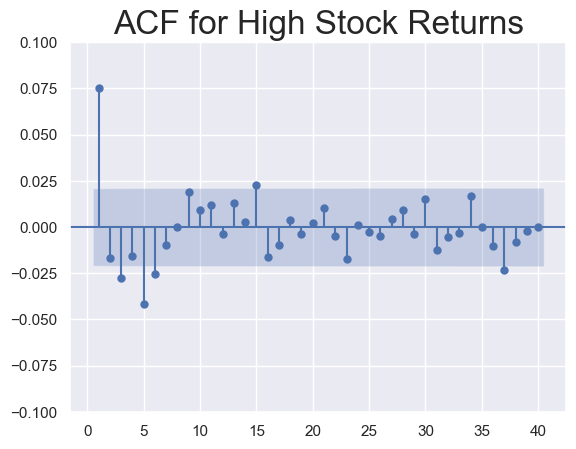

In [30]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.ylim(-0.1, 0.1)
plt.title("ACF for High Stock Returns", size=24)
plt.show()

In [19]:
#MA(1) for Returns

model_ret_ma1 = ARIMA(df.returns[1:], order=(0,0,1))
results_ret_ma1 = model_ret_ma1.fit()
results_ret_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -16759.508
Date:                Mon, 07 Aug 2023   AIC                          33525.015
Time:                        07:59:16   BIC                          33546.245
Sample:                    01-03-1962   HQIC                         33532.249
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.019      4.264      0.000       0.044       0.119
ma.L1          0.0778      0.008      9.810      0.000       0.062       0.093
sigma2         2.7013      0.022    122.600      0.000       2.658       2.744
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9449.16
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.24
Prob(H) (two-sided):                  0.33   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#MA(p)

model_ret_ma2 = ARIMA(df.returns[1:], order=(0,0,2))
results_ret_ma2 = model_ret_ma2.fit()
print(results_ret_ma2.summary())
print("LLR Test: " + str(LLR_test(model_ret_ma1, model_ret_ma2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -16758.787
Date:                Mon, 07 Aug 2023   AIC                          33525.574
Time:                        08:01:47   BIC                          33553.880
Sample:                    01-03-1962   HQIC                         33535.219
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.019      4.319      0.000       0.044       0.118
ma.L1          0.0761      0.008      9.582      0.000       0.061       0.092
ma.L2         -0.0130      0.008     -1.673      0.0

In [25]:
model_ret_ma3 = ARIMA(df.returns[1:], order=(0,0,3))
results_ret_ma3 = model_ret_ma3.fit()
print(results_ret_ma3.summary())
print("LLR Test: " + str(LLR_test(model_ret_ma2, model_ret_ma3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -16755.433
Date:                Mon, 07 Aug 2023   AIC                          33520.867
Time:                        08:09:00   BIC                          33556.250
Sample:                    01-03-1962   HQIC                         33532.924
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.018      4.443      0.000       0.045       0.117
ma.L1          0.0758      0.008      9.568      0.000       0.060       0.091
ma.L2         -0.0174      0.008     -2.228      0.0

In [26]:
model_ret_ma4 = ARIMA(df.returns[1:], order=(0,0,4))
results_ret_ma4 = model_ret_ma4.fit()
print(results_ret_ma4.summary())
print("LLR Test: " + str(LLR_test(model_ret_ma3, model_ret_ma4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(0, 0, 4)   Log Likelihood              -16754.878
Date:                Mon, 07 Aug 2023   AIC                          33521.756
Time:                        08:10:45   BIC                          33564.215
Sample:                    01-03-1962   HQIC                         33536.224
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.018      4.494      0.000       0.046       0.117
ma.L1          0.0752      0.008      9.454      0.000       0.060       0.091
ma.L2         -0.0178      0.008     -2.281      0.0

In [27]:
model_ret_ma5 = ARIMA(df.returns[1:], order=(0,0,5))
results_ret_ma5 = model_ret_ma5.fit()
print(results_ret_ma5.summary())
print("LLR Test: " + str(LLR_test(model_ret_ma4, model_ret_ma5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -16748.540
Date:                Mon, 07 Aug 2023   AIC                          33511.080
Time:                        08:11:28   BIC                          33560.616
Sample:                    01-03-1962   HQIC                         33527.959
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.017      4.672      0.000       0.047       0.115
ma.L1          0.0740      0.008      9.275      0.000       0.058       0.090
ma.L2         -0.0173      0.008     -2.225      0.0

In [28]:
model_ret_ma6 = ARIMA(df.returns[1:], order=(0,0,6))
results_ret_ma6 = model_ret_ma6.fit()
print(results_ret_ma6.summary())
print("LLR Test: " + str(LLR_test(model_ret_ma5, model_ret_ma6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 8748
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -16746.374
Date:                Mon, 07 Aug 2023   AIC                          33508.749
Time:                        08:12:20   BIC                          33565.362
Sample:                    01-03-1962   HQIC                         33528.040
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.017      4.755      0.000       0.048       0.115
ma.L1          0.0745      0.008      9.263      0.000       0.059       0.090
ma.L2         -0.0171      0.008     -2.184      0.0

In [31]:
#Residuals for Returns

df['res_ret_ma6'] = results_ret_ma6.resid[1:]

In [32]:
print("Mean: " + str(round(df.res_ret_ma6.mean())))
print("Variance: " + str(round(df.res_ret_ma6.var())))

Mean: 0
Variance: 3


In [33]:
round(sqrt(df.res_ret_ma6.var()),3)

1.641

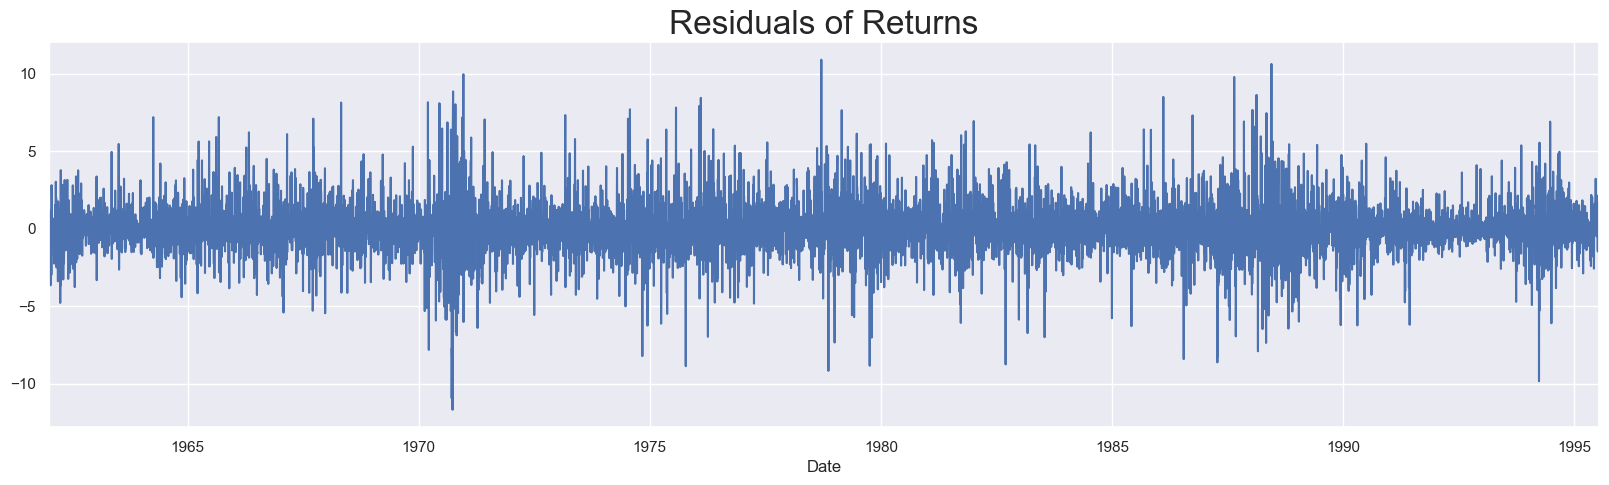

In [35]:
df.res_ret_ma6[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [38]:
sts.adfuller(df.res_ret_ma6[2:])

(-93.48134344430008,
 0.0,
 0,
 8746,
 {'1%': -3.43109790993778,
  '5%': -2.861870526484161,
  '10%': -2.566945934275714},
 33356.09233682786)

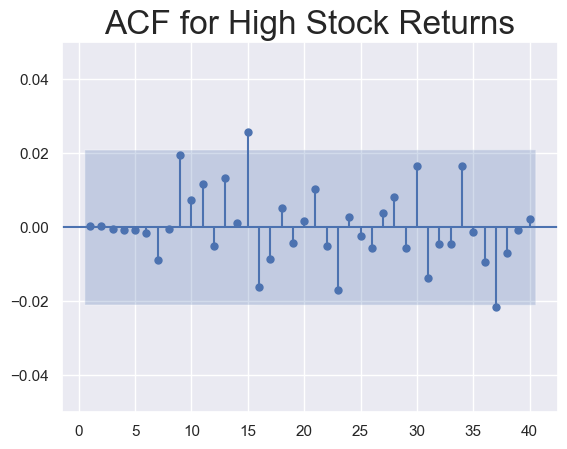

In [40]:
sgt.plot_acf(df.res_ret_ma6[2:], zero=False, lags=40)
plt.ylim(-0.05, 0.05)
plt.title("ACF for High Stock Returns", size=24)
plt.show()

In [41]:
#MA Model for Normalized Returns

bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

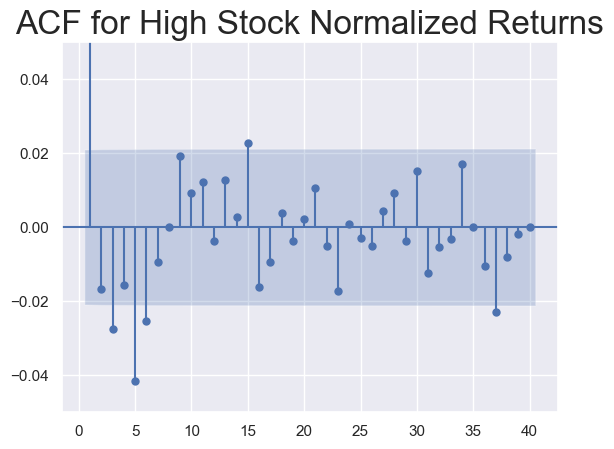

In [44]:
sgt.plot_acf(df.norm_ret[1:], zero=False, lags=40)
plt.ylim(-0.05, 0.05)
plt.title("ACF for High Stock Normalized Returns", size=24)
plt.show()

In [47]:
model_norm_ret_ma6 = ARIMA(df.norm_ret[1:], order=(0,0,6))
results_norm_ret_ma6 = model_norm_ret_ma6.fit()
results_norm_ret_ma6.summary()

#Normalizing Returns does not affect model selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 8748
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -44697.319
Date:                Mon, 07 Aug 2023   AIC                          89410.639
Time:                        08:38:35   BIC                          89467.251
Sample:                    01-03-1962   HQIC                         89429.930
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9829      0.417     -4.753      0.000      -2.800      -1.165
ma.L1          0.0745      0.008      9.263      0.000       0.059       0.090
ma.L2         -0.0171      0.008     -2.184      0.029      -0.032      -0.002
ma.L3         -0.0275      0.008     -3.433      0.001      -0.043      -0.012
ma.L4         -0.0119      0.009     -1.382      0.167      -0.029       0.005
ma.L5         -0.0388      0.007     -5.540      0.000      -0.053      -0.025
ma.L6         -0.0224      0.009     -2.623      0.009      -0.039      -0.006
sigma2      1605.2256     13.171    121.873      0.000    1579.410    1631.041
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9397.94
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.21
Prob(H) (two-sided):                  0.38   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
df['res_norm_ret_ma6'] = results_norm_ret_ma6.resid[1:]

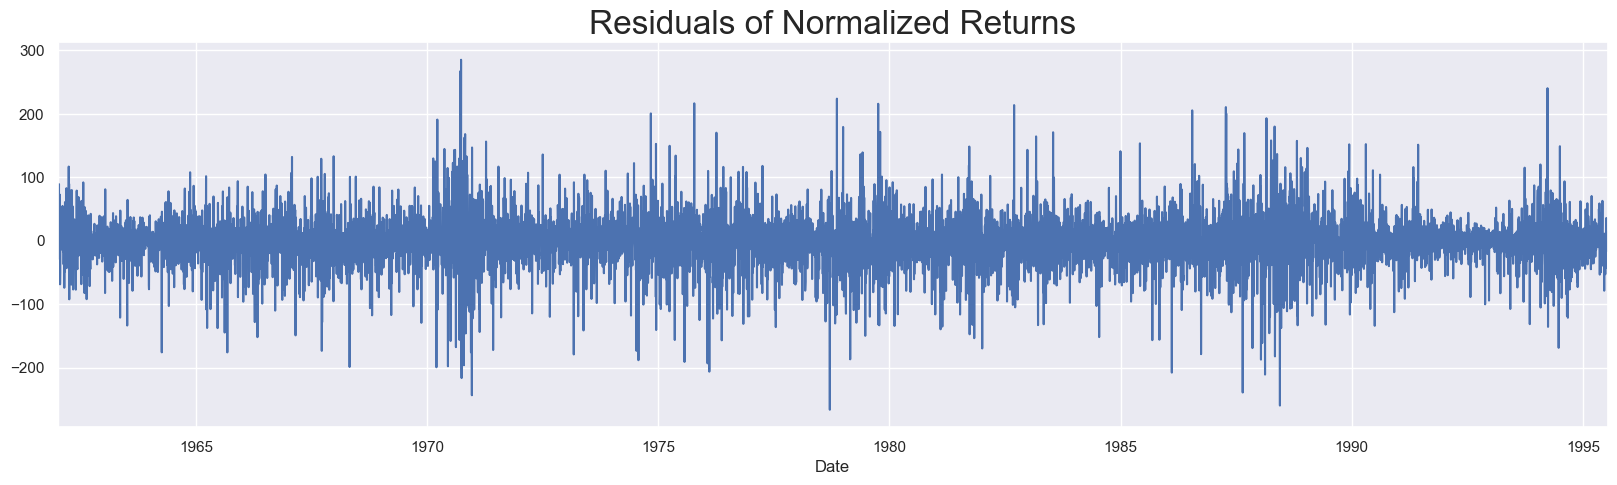

In [49]:
df.res_norm_ret_ma6[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns", size=24)
plt.show()

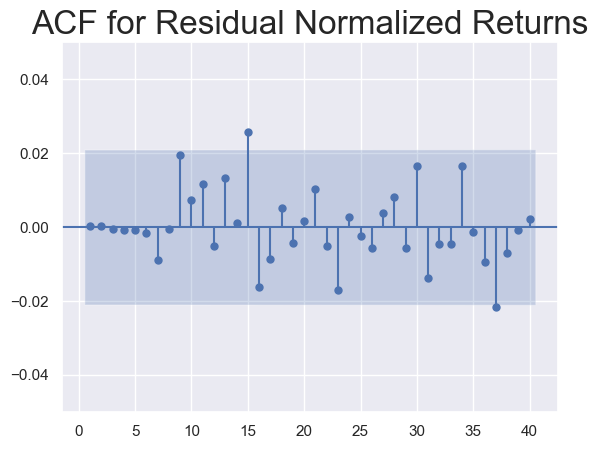

In [52]:
sgt.plot_acf(df.res_norm_ret_ma6[2:], zero=False, lags=40)
plt.ylim(-0.05, 0.05)
plt.title("ACF for Residual Normalized Returns", size=24)
plt.show()

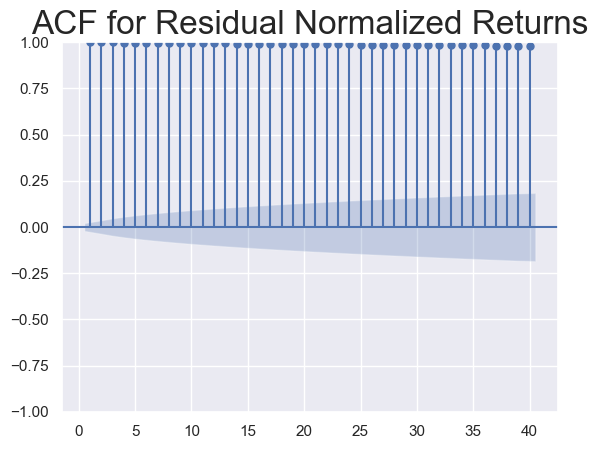

In [53]:
#MA Models for Non-Stationary Data (Stock Prices)

sgt.plot_acf(df.stock_high, zero=False, lags=40)
plt.ylim(-1,1)
plt.title("ACF for Residual Normalized Returns", size=24)
plt.show()

In [55]:
model_ma1 = ARIMA(df.stock_high, order=(0,0,1))
results_ma1 = model_ma1.fit()
results_ma1.summary()

#MA models does not work well on non-stationary data

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             stock_high   No. Observations:                 8749
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -23178.805
Date:                Mon, 07 Aug 2023   AIC                          46363.609
Time:                        08:50:41   BIC                          46384.839
Sample:                    01-02-1962   HQIC                         46370.843
                         - 07-14-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4079      0.125     43.181      0.000       5.162       5.653
ma.L1          0.9914      0.001   1108.716      0.000       0.990       0.993
sigma2        11.7079      0.390     30.005      0.000      10.943      12.473
===================================================================================
Ljung-Box (L1) (Q):                8232.02   Jarque-Bera (JB):              1403.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.45   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""